R-squared (R²) value: 0.6359


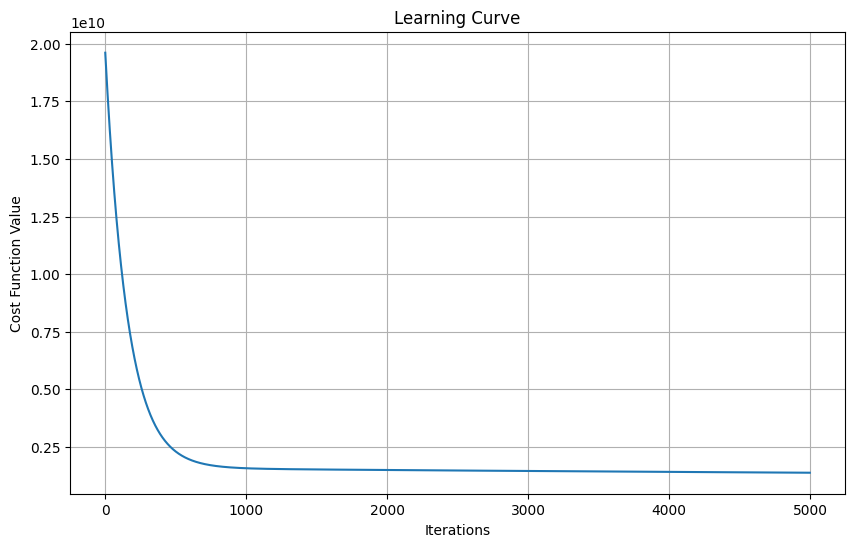

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]
X_test = test.drop("SalePrice", axis=1)
y_test = test["SalePrice"]

fmin = X_train.min(axis=0)
frange = X_train.max(axis=0) - X_train.min(axis=0)
X_train = (X_train - fmin) / frange
fmin = X_test.min(axis=0)
frange = X_test.max(axis=0) - X_test.min(axis=0)
X_test = (X_test - fmin) / frange

weights = np.random.randn(X_train.shape[1]) * 0.01
bias = 0.01

learning_rate = 0.001
iterations = 5000
alpha = 0.001

cost_history = []
weights_history = []

def costFunction(y, predictions, weights, alpha):
    N = len(y)
    sq_error = (predictions - y) ** 2
    regularization_term = (alpha / (2 * N)) * np.sum(weights**2)
    return (1.0 / (2 * N)) * sq_error.sum() + regularization_term

for i in range(iterations):
    predictions = np.dot(X_train, weights) + bias
    error = predictions - y_train
    N = X_train.shape[0]
    dw = (1 / N) * np.dot(X_train.T, error) + (alpha / N) * weights
    db = np.sum(error) / N
    weights -= learning_rate * dw
    bias -= learning_rate * db
    current_cost = costFunction(y_train, predictions, weights, alpha)
    cost_history.append(current_cost)
    weights_history.append(weights.copy())

predictions_test = np.dot(X_test, weights) + bias

y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()
rss = ((y_test - predictions_test) ** 2).sum()
r_squared = 1 - (rss / tss)

print(f'R-squared (R²) value: {r_squared:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.grid(True)
plt.show()

 